# Machine Learning Models from Scratch

## Linear Regression

In [69]:
# Only numpy bitch! fuck yo scikit.... ok now do it without numpy... 
import numpy as np

# little bit of matplot tho
import matplotlib.pyplot as plt

In [71]:
class LinearRegression:

    def __init__(self, learning_rate = 0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.theta = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.theta = np.zeros(n_features)

        y = y.ravel()
        
        for _ in range(self.n_iterations):
            y_pred = np.dot(X, self.theta)

            gradient = -(2 / n_samples) * np.dot(X.T, (y - y_pred))

            self.theta = self.theta - self.learning_rate * gradient

    def predict(self, X):
        return np.dot(X, self.theta)

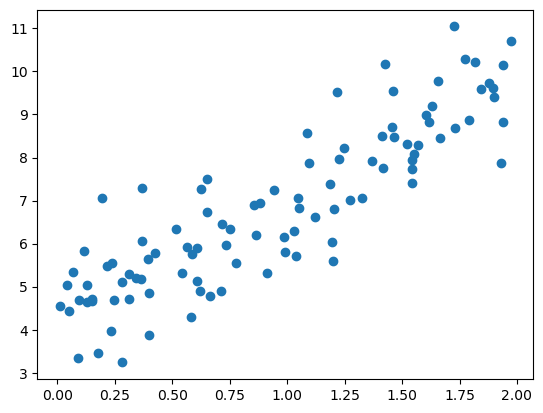

In [73]:
# Create our data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

X_b = np.c_[np.ones((X.shape[0], 1)), X]

# visualise our data
plt.scatter(X, y)


In [75]:
# Train the beast

lin_reg = LinearRegression()
lin_reg.fit(X_b, y)

In [81]:
y_pred = lin_reg.predict(X_b)
print("Learned weights (theta):", lin_reg.theta)

Learned weights (theta): [4.1819175  2.79940834]


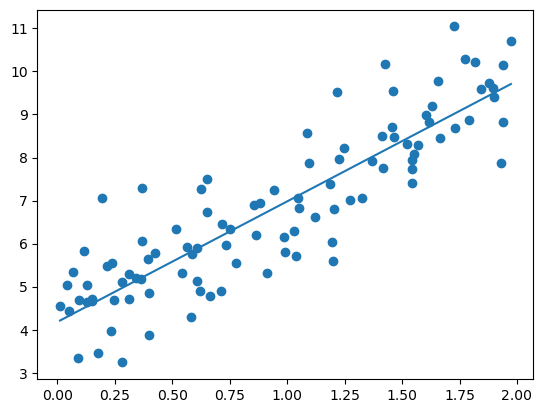

In [10]:
# Revisualise with theta
plt.scatter(X, y)

X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_range_b = np.c_[np.ones((X_range.shape[0], 1)), X_range]
y_pred = X_range_b.dot(lin_reg.theta)

plt.plot(X_range, y_pred)

so this is great and all... but I still didn't derive this from scratch myself... i had help... im pathetic at this stuff... i try again!

## Procedurally building linear_regression

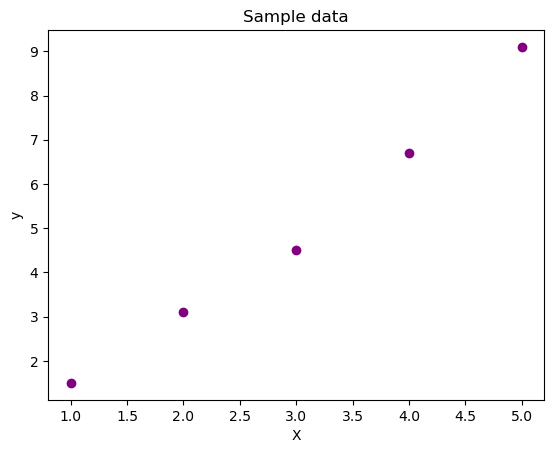

In [48]:
# X = 2 * np.random.randn(100, 1)
# y = 1 + 2 * X + np.random.randn(100,1)
X = np.array([1,2,3,4,5]).reshape(-1,1)
y = np.array([1.5, 3.1, 4.5, 6.7, 9.1])

plt.scatter(X,y, color="purple")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Sample data")
plt.show()

In [50]:
# Add the bias

X_b = np.c_[np.ones((X.shape[0], 1)), X]
X_b

array([[1., 1.],
       [1., 2.],
       [1., 3.],
       [1., 4.],
       [1., 5.]])

In [52]:
# initialize weights

theta = np.zeros(X_b.shape[1])
theta

array([0., 0.])

In [54]:
# Calculate a prediction

y_pred = np.dot(X_b, theta)
y_pred

array([0., 0., 0., 0., 0.])

In [56]:
# Define the cost function

def compute_cost(X_b, y, theta):
    n_samples = len(y)
    y_pred = np.dot(X_b, theta)
    cost = (1/n_samples) * np.sum((y - y_pred) **2)
    return cost

initial_cost = compute_cost(X_b, y, theta)
initial_cost

31.962000000000003

In [63]:
# Running gradient decent

learning_rate = 0.01
n_iterations = 1000
XX = []
yy = []
for iteration in range(n_iterations):
    y_pred = np.dot(X_b, theta)
    gradient = -(2/len(y)) * np.dot(X_b.T, (y-y_pred))
    theta -= learning_rate * gradient
    XX.append(theta[0])
    yy.append(theta[1])

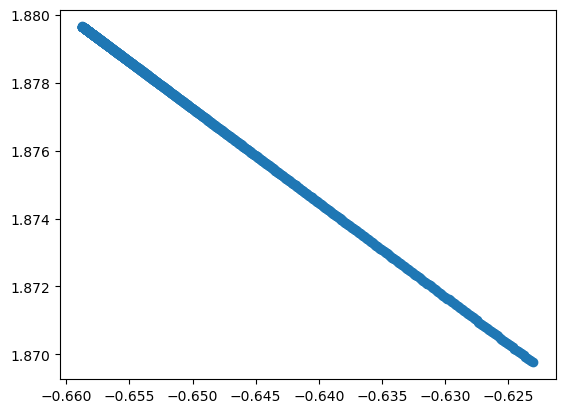

In [67]:
y_pred = np.dot(X_b, theta)

plt.scatter(XX, yy)
# plt.plot( X, y_pred)

## My Lin reg with steps (Future me needs to look here)

So again from the top:

1 - Get the data, your x and ys
2 - Reshape your Xs
3 - add the bias term to X; a column of ones
4 - initialize theta; an array of 0s with as many elemtns(columns) as features of X_b, I think only 2 for linear reg
5 - perform gradient decent to fit the data i.e make theta great (find the best slope)
    5.1 - make a predict using the dot product
    5.2 - calculate gradient decent
    5.3 - optimise gradient decent
6 - make predictions
7 - visualize training data, regression line and new prediction

X_bais [[1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]
 [1. 5.]
 [1. 6.]
 [1. 7.]
 [1. 8.]
 [1. 9.]]
Theta initialized [0. 0.]
Found theta [0.99212849 1.01880057]
Predictions on the trainig data: [ 2.01092906  3.02972963  4.0485302   5.06733077  6.08613134  7.1049319
  8.12373247  9.14253304 10.16133361]
Predicitions on the new data:  [11.18013418 13.21773531]



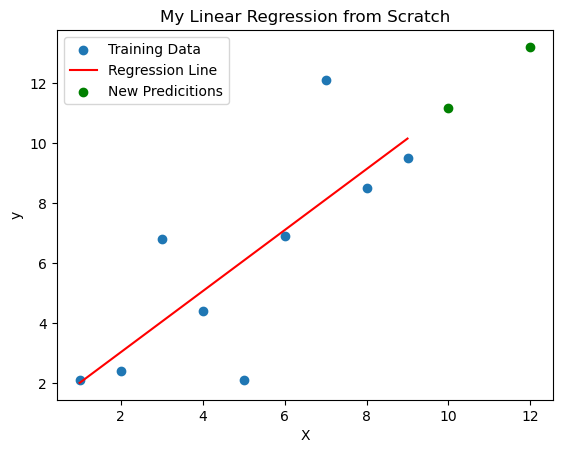

In [209]:
# 1 & 2
X = np.array([1,2,3,4,5,6,7,8,9]).reshape(-1, 1)
y =np.array([2.1,2.4,6.8,4.4,2.1,6.9,12.1,8.5,9.5])

# 3
X_b = np.c_[np.ones((X.shape[0], 1)), X]
print("X_bais", X_b)

# 4
theta = np.zeros(X_b.shape[1])
print("Theta initialized", theta)

# 5
learning_rate = 0.01
iterations = 1000
for _ in range(iterations):
    # 5.1
    y_pred = np.dot(X_b, theta)

    # 5.2
    gradient = 2/len(y) * X_b.T.dot(X_b.dot(theta) - y) # or -(2 / len(y)) * np.dot(X_b.T, (y - y_pred))

    # 5.3
    theta = theta - learning_rate * gradient

print("Found theta", theta)

# 6 
# on the training data
y_training_pred = np.dot(X_b, theta)
print("Predictions on the trainig data:", y_training_pred)

# or on new data coming in
# reshape the new data from a list to row array
new_X = np.array([10, 12]).reshape(-1, 1)

# add the column of 1s again
new_X_b = np.c_[np.ones((new_X.shape[0], 1)), new_X]

# predict
y_pred = np.dot(new_X_b ,theta)
print("Predicitions on the new data: ", y_pred)

# 7
print()
plt.scatter(X, y, label = "Training Data")
plt.plot(X, y_training_pred, color="red", label = "Regression Line")
plt.scatter(new_X, y_pred, color = "green", label = "New Predicitions")
plt.xlabel("X")
plt.ylabel("y")
plt.title("My Linear Regression from Scratch")
plt.legend()
plt.show()

## Logistic Regression

Example Scenario for Log reg
Imagine we're building a logistic regression model to predict whether a person has a specific condition 
(e.g., diabetes) based on their age and blood sugar level:

Data:
Age	Blood Sugar	Diabetes (y)
25	90	0 (no diabetes)
35	150	1 (has diabetes)
45	200	1 (has diabetes)
Transformed Data:
For logistic regression, we add a bias term (column of 1s) to 𝑋. Here's how 𝑋 and y look after this transformation:


X= 1 25 90
   1 35 150
   1 45 200
 
First column: Bias term (all 1s).
Second column: Age.
Third column: Blood sugar.

y= 0
   1
   1
   
Labels indicating whether the person has diabetes.

In [218]:
import numpy as np

In [266]:

# 1 - Define the sigmoid function
def sigmoid(z):
    """
    Calculates if a prediction is a 1 or a 0

    Parameters:
    - z: an array of predictions (i think)

    Returns:
    - The predicition for the ith element in the array
    """
    
    return 1 / (1 + np.exp(-z))

z = np.array([-5, 0 ,5])
print(f"Testing the sigmoid Function: {sigmoid(z)}")

Testing the sigmoid Function: [0.00669285 0.5        0.99330715]


In [291]:
# 2 - Write the cost function & initialize our data
def log_loss(X, y, theta): # or computing the cost function, log loss is our cost function
    """
    Compute the cost for logistic regression.

    Parameters:
    - X: Features matrix (with bias term added)
    - y: Actual labels (0 or 1)
    - theta: Current weights

    Returns:
    - cost: The log loss value.
    """

    m = len(y)
    y_pred = sigmoid(np.dot(X, theta))
    cost = -(1 / m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    return cost

X = np.array([[1,2], [1,3], [1,4]]) # The X data looks like this as it saves us from reshaping to two columns and adding ones for testing... or so i believe
y = np.array([0, 1, 1])
theta = np.zeros(X.shape[1])

cost = log_loss(X, y, theta)
print("Initial cost:", cost)

Initial cost: 0.6931471805599452


In [315]:
# We are going to be repeating some steps here but its all about put the smaller pieces together

# 1 - Initialize data
X = np.array([[0.2, 0.7], [0.3, 0.3], [0.4, 0.5], [0.6, 0.9]])
y = np.array([0,1,1,0])

# 2 - Add bias
X_b = np.c_[np.ones((X.shape[0], 1)), X]

# 3 - Initialise theta
theta = np.zeros(X_b.shape[1])

# 4 - Define sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# 5 - Gradient decent
learning_rate = 0.1
iterations = 1000
m = len(y)

for _ in range(iterations):
    # 5.1 - Compute the predictions
    z = np.dot(X_b, theta)
    y_pred = sigmoid(z)

    # 5.2 - Calculate gradient decent
    gradient = (1/m) * np.dot(X_b.T, (y_pred - y))
    
    # 5.3 - Update theta
    theta -= learning_rate * gradient

# Giga theta optimized
# print("Optimized theta", theta)

# 6 - Making predictions
# new predictions
X_new = np.array([[0.3,0.6],[0.5, 0.4]])

# add the 1s column
X_new_b = np.c_[np.ones((X_new.shape[0], 1)), X_new]

# Get our predictions
new_z = np.dot(X_new_b, theta)
y_pred_probs = sigmoid(new_z)
print("predicted probabilities:" , y_pred_probs)

# classify the prediction based on a 0.5 threshold
y_pred_class = (y_pred_probs >= 0.5).astype(int)
print("Predicted Classes:", y_pred_class)

predicted probabilities: [0.46476682 0.73798987]
Predicted Classes: [0 1]


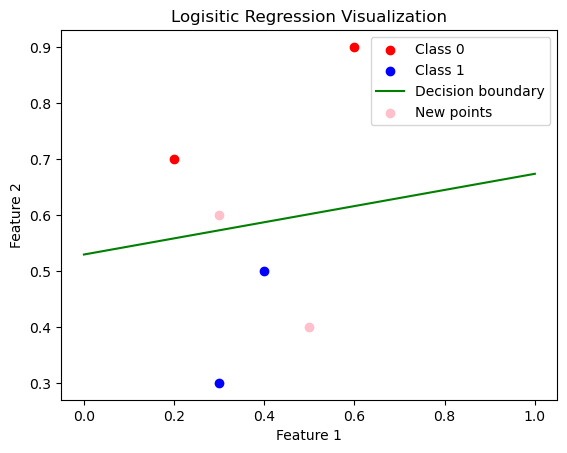

In [335]:
# The following plotting code i did not come up with... still very hard for me to write visualization code

# Plotting the training data
plt.scatter(X[y==0][:, 0], X[y ==0][:, 1], color = "red", label = "Class 0")
plt.scatter(X[y==1][:, 0], X[y ==1][:, 1], color = "blue", label = "Class 1")

# Boundaries
x1_vals = np.linspace(0, 1, 100)
x2_vals = -(theta[0] + theta[1] * x1_vals) / theta[2]
plt.plot(x1_vals, x2_vals, color="green", label="Decision boundary")

# Plot the new preds
plt.scatter(X_new[:, 0], X_new[:, 1], color = "pink", label = "New points")

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Logisitic Regression Visualization")
plt.legend()
plt.show()

## KNN

### Classification

In [354]:
# 1 Set up the data

X = np.array([[0.1, 0.3], [0.4, 0.5], [0.7, 0.8], [0.3, 0.2], [0.6, 0.1]])
y = np.array([0, 1, 1, 0, 1])

# Set a point for prediction
query_point = np.array([0.5, 0.4])

# 2 Distance Calculation using the euclidean distance algorithm
def euclid_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

distance = [euclid_distance(query_point, x) for x in X]
print("distances", distance)

# 3 Find the neighbours.... the k amount of training instances closest to our new query
k = 3
neighbour_indices = np.argsort(distance)[:k] # argsort sorts the in acending order and we only want up to k amount of instances.
print("indices of nearest neighbors ", neighbour_indices) 

# 4 Classify the querys output depending on its nearest neighbours
neighbour_labels = y[neighbour_indices]
print("neighbours labels ", neighbour_labels)

# maigc coming up
from collections import Counter
predicted_class = Counter(neighbour_labels).most_common(1)[0][0]
print("Predicted class ", predicted_class)

distances [0.4123105625617661, 0.14142135623730948, 0.4472135954999579, 0.28284271247461906, 0.31622776601683794]
indices of nearest neighbors  [1 3 4]
neighbours labels  [1 0 1]
Predicted class  1


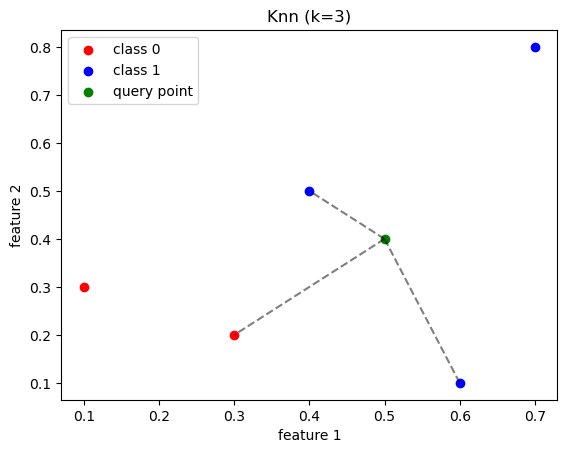

In [362]:
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color = "red", label = "class 0")
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color = "blue", label = "class 1")

plt.scatter(query_point[0], query_point[1], color = "green", label = "query point")

# This next part is for "highlighting the neighbours"
for idx in neighbour_indices:
    plt.plot([query_point[0], X[idx, 0]], [query_point[1], X[idx, 1]], "k--", alpha=0.5)

plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.legend()
plt.title("Knn (k=3)")
plt.show()

### Regression

In [382]:
# 1 Create the data
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([1.5, 1.7, 2.0, 2.5, 2.8])

query_point = np.array([3.5])

def euclid_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

# 2 Calculate the distances, fine the K nearest neighboursm average their y values
def knn_regression(X, y, query_point, k):
    distances = [euclid_distance(query_point, x) for x in X] # We already made the algo in the classification section, so reuse here

    neighbours_indices = np.argsort(distances)[: k]
 
    neighbour_values = y[neighbours_indices]
    return np.mean(neighbour_values)

knn_regression(X, y, query_point, 3)

# Very simple i feel. i should remake the euclid algo

2.066666666666667

Something to note is a tie for classificiation, either change k by minusing or adding 1 or use a weighted score
of the nearest neighbours to determine class.


## SVMS

In [510]:
import numpy as np
import matplotlib.pyplot as plt
# 1 create the data or prep the data

X = np.array([[1,2], [2, 3], [3, 5], [5, 5], [1, 0], [0, 1], [3, 2], [5, 2],])
y = np.array([-1, -1, -1, -1, 1, 1, 1, 1])

# Visualise the data
# plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color = "red", label = "feature 1")
# plt.scatter(X[y == 1][:, -0], X[y == -1][:, 1], color = "blue", label = "feature 2")
# plt.legend()
# plt.xlabel("feature 1")
# plt.ylabel("feature 2")
# plt.title("2D dataset")
# plt.show()

In [542]:
# 2 initialise the params

w = np.zeros(X.shape[1])
b = 0.0 # different bias from lin reg and log reg

# 3 gradient decent for svm... its a little more trickier then the others we have seen so far
learning_rate = 0.001
C = 0.3 # Measures loss function v margin violation ratio... i think, kinda.
epochs = 1000

for _ in range(epochs):
    for i in range(len(y)):
        condition = y[i] * np.dot(w, X[i]) + b >= 1

        if condition:
            w = w - learning_rate  * w # margin good = only regularize

        else:
            # margin bad == apply the hinge loss  and regularization
            w = w - learning_rate * (w - C * y[i] * X[i])
            b = b - learning_rate * (-C * y[i])
        

# 3 Predictions
print(f"The trained equation is f(x) = {w} * x + {b}")
print(f"For new input x if f(x) > 0 then {w[0]} applies, otherwise {w[1]} applies... i think")

def predict(X):
    linear_output = np.dot(X, w) + b
    return np.sign(linear_output)

new_X = np.array([[1,1]])
predict(new_X)

The trained equation is f(x) = [ 0.04119844 -0.1840859 ] * x + 0.2648999999999981
For new input x if f(x) > 0 then 0.04119844295647793 applies, otherwise -0.18408589568142028 applies... i think


array([1.])

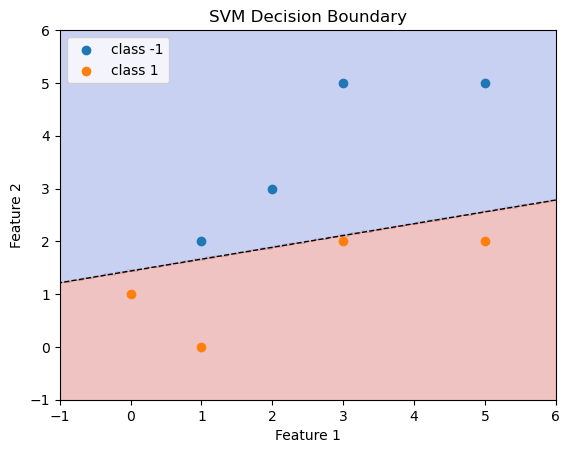

In [544]:

# 4 Visualise - More familiar but difficult plotting code for me
# Plotting the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), 
                     np.linspace(y_min, y_max, 200))

# Calculate the decision boundary for each point in the meshgrid
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = np.dot(grid_points, w) + b
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, np.sign(Z), alpha=0.3, cmap=plt.cm.coolwarm)  # Color regions
plt.contour(xx, yy, Z, levels=[0], colors="black", linewidths=1, linestyles="--")  # Actual decision boundary

# Plot training data
for i, label in enumerate(np.unique(y)):
    plt.scatter(X[y == label][:, 0], X[y == label][:, 1], label=f"class {label}")

plt.legend()
plt.title("SVM Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

## Decision trees

In [113]:
# 1 calkculate impurity

import numpy as np

def calculate_gini(labels):
    class_counts = np.bincount(labels) # a new one from numpy, counts the occurance of a class... or type of value, etc

    probabilities = class_counts / len(labels)

    gini = 1 - np.sum(probabilities**2)

    return gini 

# Testing gini
print("should be 0.5", calculate_gini([1,0,1,0]))
print("should be 0", calculate_gini([1,1,1,1]))

# 2 partition the data using a threshold on a feauture

def partition_data(X, y, feature, threshod):
    left_mask = X[:, feature] <= threshold
    right_mask = ~left_mask

    return (X[left_mask], y[left_mask]), (X[right_mask], y[right_mask])

# 3 get gini scores from splits

def calculate_split_gini(X, y, feature, threshold):
    (X_left, y_left), (X_right, y_right) = partition_data(X, y, feature, threshold)

    gini_left =  calculate_gini(y_left)
    gini_right = calculate_gini(y_right)

    total_samples = len(y)
    weighted_gini = (len(y_left) / total_samples) * gini_left + (len(y_right) / total_samples) * gini_right

    return weighted_gini # so this will be the score of the reduced classes every time, thats what gini left and right are doing


# More testing

X = np.array([2, 4, 6, 8]).reshape(-1, 1)
y = np.array([0, 0, 1, 1])

feature = 0
threshold = 5

gini_split = calculate_split_gini(X, y, feature, threshold)
print("Weighted Gini for split:", gini_split)

should be 0.5 0.5
should be 0 0.0
Weighted Gini for split: 0.0


Ok now we are going to be repeating ourselves quiet alot here but we are going to now implement with the ability to find the best
feature and threshold to split on, similiar but slightly different as we are no longer passing in a hardcoded feature and threshold

In [120]:
def gini_impurity(y):
    classes, counts = np.unique(y, return_counts = True)  # unique is similiar to bincount except we want uniques
    probabilities = counts / len(y)
    return 1 - np.sum(probabilities ** 2)

def weight_gini(left_y, right_y):
    total_samples = len(left_y) + len(right_y)
    weight_left = len(left_y) / total_samples
    weight_right = len(right_y) / total_samples
    return (weight_left * gini_impurity(left_y)) + (weight_right * gini_impurity(right_y))

def find_best_split(X, y):
    best_gini = float('inf')
    best_split = None

    for feature in range(X.shape[1]):
        thresholds = np.unique(X[:, feature])

        for threshold in thresholds:
            left_indices = X[:, feature] <= threshold
            right_indices = X[:, feature] > threshold

            left_y, right_y = y[left_indices], y[right_indices]

            if len(left_y) == 0 or len(right_y) == 0:
                continue

            gini = weight_gini(left_y, right_y)

            if gini < best_gini:
                best_gini = gini
                best_split = {
                     "feature": feature,
                     "threshold": threshold,
                     "gini": gini,
                     "left_indices": left_indices,
                     "right_indices": right_indices
                }

    return best_split

# Holy fuck..... rerally not that hard, but im a retard so really that is hard for me and holy shit its functional as fuck.... 
# I dont like that aspect... not very procedual of me

X = np.array([2,4, 6, 8]).reshape(-1, 1)
y = np.array([0, 0, 1, 1])

best_split = find_best_split(X, y)
print("The best shit:", best_split)

The best shit: {'feature': 0, 'threshold': 4, 'gini': 0.0, 'left_indices': array([ True,  True, False, False]), 'right_indices': array([False, False,  True,  True])}


damn.... aight, defs easier to just use sklearn, but defs more fun building it from the ground up.... using numpy... never not using numpy

Ok a different day now. We are going to finish these off, so that means we are going to work through recursion through the whole tree to 
build it out and stop it only on max depth or some other factor.... So more repeated code to build from scratch again

In [138]:
def build_tree(X, y, depth=0, max_depth=None, min_samples_split=2):
    # Stopping conditions
    if max_depth is not None and depth >= max_depth:
        return {"type": "leaf", "prediction": majority_vote(y)}
    
    if len(y) < min_samples_split or len(np.unique(y)) == 1:
        return {"type": "leaf", "prediction": majority_vote(y)}
    
    # Find the best split
    feature_idx, threshold = find_best_split(X, y)
    
    if feature_idx is None:
        return {"type": "leaf", "prediction": majority_vote(y)}
    
    # Split data
    left_idx = X[:, feature_idx] < threshold
    right_idx = ~left_idx
    
    # Recursively build left and right branches
    left_branch = build_tree(X[left_idx], y[left_idx], depth + 1, max_depth, min_samples_split)
    right_branch = build_tree(X[right_idx], y[right_idx], depth + 1, max_depth, min_samples_split)
    
    # Return a node
    return {
        "type": "node",
        "feature_idx": feature_idx,
        "threshold": threshold,
        "left": left_branch,
        "right": right_branch
    }


def majority_vote(y):
    values, counts = np.unique(y, return_counts = True) 
    return values[np.argmax(counts)]


def find_best_split(X, y):
    best_feature = None
    best_threshold = None
    best_impurity = float('inf')
    
    for feature_idx in range(X.shape[1]):
        thresholds = np.unique(X[:, feature_idx])
        
        for threshold in thresholds:
            left_idx = X[:, feature_idx] < threshold
            right_idx = ~left_idx
            
            if len(y[left_idx]) == 0 or len(y[right_idx]) == 0:
                continue
            
            impurity = gini_impurity(y[left_idx]) + gini_impurity(y[right_idx])
            
            if impurity < best_impurity:
                best_feature = feature_idx
                best_threshold = threshold
                best_impurity = impurity
    
    return best_feature, best_threshold


def gini_impurity(y):
    classes, counts = np.unique(y, return_counts = True)  # unique is similiar to bincount except we want uniques
    probabilities = counts / len(y)
    return 1 - np.sum(probabilities ** 2)


def predict(tree, X):
    if tree["type"] == "leaf":
        return tree["prediction"]

    feature_idx = tree["feature_idx"]
    threshold = tree["threshold"]

    if X[feature_idx] < threshold:
        return predict(tree["left"], X)
    else:
        return predict(tree["right"], X)


In [142]:
X = np.array([2,3,10,19,20]).reshape(-1, 1)
y = np.array([0,0,1,1,0])

tree = build_tree(X, y, max_depth = 3)

print(tree)

X_new = np.array([[15]])
print(predict(tree, X_new[0]))

{'type': 'node', 'feature_idx': 0, 'threshold': 10, 'left': {'type': 'leaf', 'prediction': 0}, 'right': {'type': 'node', 'feature_idx': 0, 'threshold': 20, 'left': {'type': 'leaf', 'prediction': 1}, 'right': {'type': 'leaf', 'prediction': 0}}}
1


Ok ok ok ok, i wave the fucking white flag for now. Im going to go do a chapter of the book now, 7 i believe on random forests and what not and then probalby come back to implement on from scratch, but i just wanna be honest and say..... this shit is starting to become alot more than my peanut programming brain can build. It's not that it's hard, it's that im not a good enough programmer to implement an easy straight forward solution, never the less i will continue to try and get better and build what i can build.

## Random Forests